In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv('../../data/processed/combined_data_v4_nearby_road_1km.csv')

In [4]:
df.dropna(inplace=True)
df.isnull().sum()
 

address_subdivision    0
address_locality       0
address_line_2         0
h_id                   0
category_name          0
                      ..
f_unused               0
mean                   0
median                 0
max                    0
min                    0
Length: 196, dtype: int64

In [5]:
from scipy.stats import zscore

# Calculate z-score for each row within each h_id group for numerical columns

# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute z-scores within each h_id group
df_zscore = df.groupby('h_id')[numeric_cols].transform(zscore)

# Mark outliers: absolute z-score > 3
outliers = (df_zscore.abs() > 3)

# Count outliers per h_id
outlier_counts = outliers.groupby(df['h_id']).sum()

outlier_counts

d:\anaconda\envs\env_v3.10\lib\site-packages\pandas\core\groupby\generic.py:1828: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  lambda x: func(x, *args, **kwargs), axis=self.axis
d:\anaconda\envs\env_v3.10\lib\site-packages\pandas\core\groupby\generic.py:1828: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  lambda x: func(x, *args, **kwargs), axis=self.axis
d:\anaconda\envs\env_v3.10\lib\site-packages\pandas\core\groupby\generic.py:1828: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  lambda x: func(x, *args, **kwargs), axis=self.axis
d:\anaconda\envs\env_v3.10\lib\site-packages\pandas\core\groupby\generic.py:1828: 

,price_per_m2,land_area,price,longitude,latitude,population,nearest_cafe,n_cafe_in_1km,n_cafe_in_1km_to_2km,n_cafe_in_2km_to_3km,...,f_tertiary,f_track,f_trunk,f_trunk_link,f_unclassified,f_unused,mean,median,max,min
h_id,,,,,,,,,,,,,,,,,,,,,
886580d243fffff,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
886580d28dfffff,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
886580d2d9fffff,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
886580d369fffff,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8865846001fffff,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8865847993fffff,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
886586a691fffff,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
886586a693fffff,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


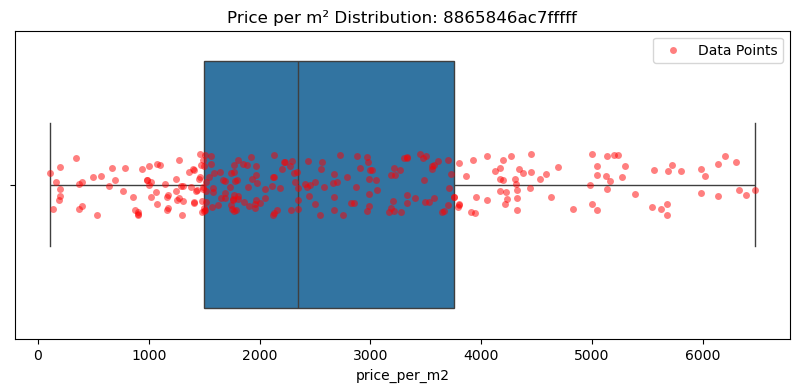

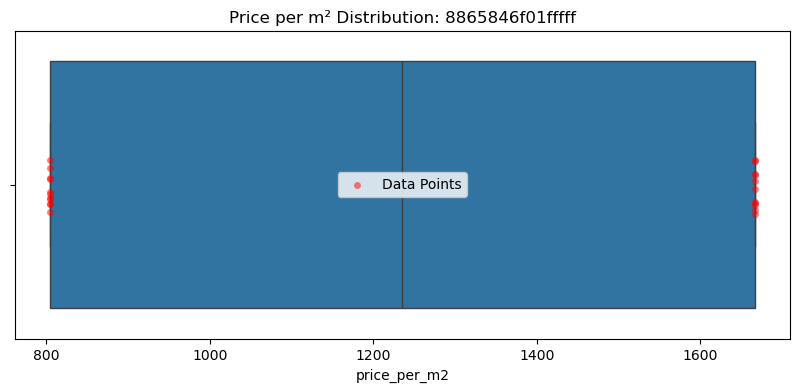

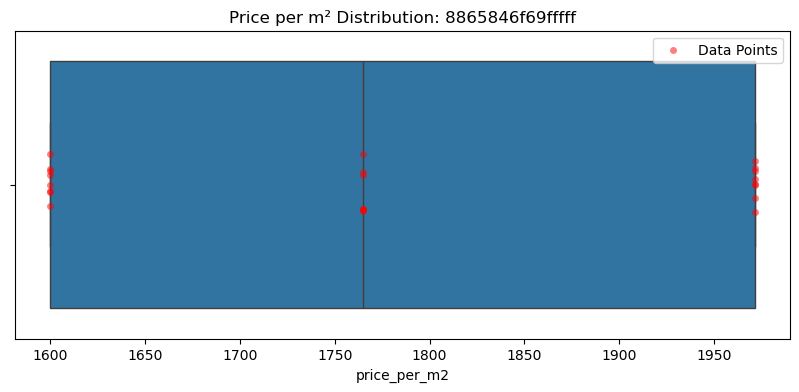

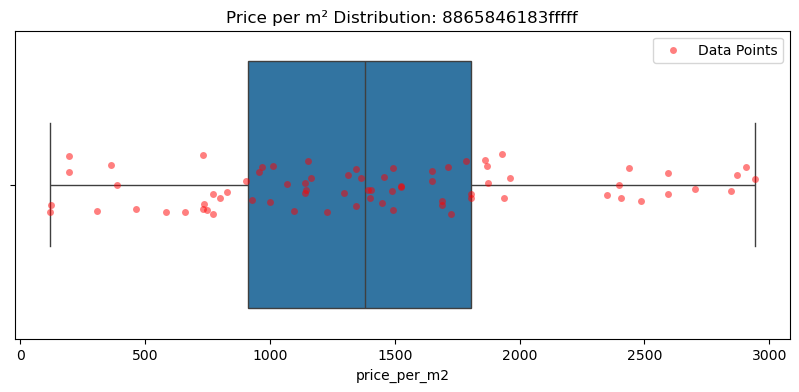

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the first 4 address_line_2 groups for plotting
groups = df['h_id'].unique()[:4]

for addr in groups:
    subset = df[df['h_id'] == addr]
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=subset['price_per_m2'])
    sns.stripplot(x=subset['price_per_m2'], color='red', alpha=0.5, label='Data Points')
    plt.title(f'Price per m² Distribution: {addr}')
    plt.xlabel('price_per_m2')
    plt.legend()
    plt.show()

In [10]:
import plotly.express as px
import plotly.io as pio

# Limit to first 20 groups for speed
groups = df['h_id'].unique()[:20]

figs = []
for addr in groups:
    subset = df[df['h_id'] == addr]
    fig = px.box(subset, x='price_per_m2', points='all', title=f'Price per m²: {addr}')
    figs.append(fig)

with open("price_per_m2_grouped_plots_2.html", "w") as f:
    for fig in figs:
        f.write(pio.to_html(fig, full_html=False, include_plotlyjs='cdn'))

In [11]:
import plotly.express as px
import plotly.io as pio

figs = []
for addr in df['h_id'].unique():
    subset = df[df['h_id'] == addr]
    fig = px.box(subset, x='price_per_m2', points='all', title=f'Price per m²: {addr}')
    figs.append(fig)

with open("all_price_per_m2_grouped_plots.html", "w") as f:
    for fig in figs:
        f.write(pio.to_html(fig, full_html=False, include_plotlyjs='cdn'))

In [12]:
df_old = pd.read_csv('../../data/processed/realestates_kh_v7.csv')

In [14]:
import plotly.express as px
import plotly.io as pio

figs = []
for addr in df_old['h_id'].unique():
    subset = df_old[df_old['h_id'] == addr]
    fig = px.box(subset, x='price_per_m2', points='all', title=f'Price per m²: {addr}')
    figs.append(fig)

with open("all_price_per_m2_grouped_plots_old_data.html", "w") as f:
    for fig in figs:
        f.write(pio.to_html(fig, full_html=False, include_plotlyjs='cdn'))